In [1]:
from PIL import Image
import cv2
import numpy as np
import json
import torch
import torch.nn as nn
from torchvision import transforms as ts


In [11]:
a=torch.ones([3,5,100,100],dtype=torch.float32)
b=torch.tensor([50,50],dtype=torch.int)

In [12]:
a[...,b[0]-5:b[0]+5:,b[1]-5:b[1]+5].shape

torch.Size([3, 5, 10, 10])

In [4]:
torch.tensor(0,dtype=torch.float32, device=torch.device('cuda:0')

In [6]:
from PIL import Image
import cv2
import numpy as np
import json
import torch
from torchvision import transforms as ts
with open("../clone/pytorch-EverybodyDanceNow/data/source/images/img_0001.jpg", 'rb') as f:
    img = Image.open(f)
    img.convert('RGB')

Array([[[229, 223, 201],
        [229, 223, 201],
        [229, 223, 201],
        ...,
        [210, 210, 198],
        [208, 212, 195],
        [205, 215, 191]],

       [[230, 224, 202],
        [230, 224, 202],
        [230, 224, 202],
        ...,
        [210, 210, 198],
        [208, 212, 195],
        [205, 215, 191]],

       [[229, 223, 199],
        [229, 223, 199],
        [228, 222, 198],
        ...,
        [211, 211, 199],
        [208, 212, 195],
        [205, 215, 191]],

       ...,

       [[103, 103,  93],
        [104, 104,  94],
        [104, 104,  94],
        ...,
        [ 83,  82,  77],
        [ 84,  85,  77],
        [ 86,  87,  79]],

       [[102, 106,  91],
        [102, 106,  91],
        [101, 105,  90],
        ...,
        [ 86,  87,  79],
        [ 87,  88,  80],
        [ 87,  90,  79]],

       [[101, 110,  89],
        [100, 109,  88],
        [ 99, 108,  87],
        ...,
        [ 87,  88,  80],
        [ 88,  91,  80],
        [ 88,  91,  80]]

In [7]:
BODY_SIZE=512
imgb=ts.Resize((BODY_SIZE,BODY_SIZE))(img)


In [9]:
imgb.save('afterresize.png')

In [1]:
with open("./data/anime/train_img/img_102_3.png", 'rb') as f:
    img = Image.open(f)
    img.convert('RGB')
with open("./data/anime/train_label/img_102_3_keypoints.json") as f:
    data = json.load(f)
trasnsform=ts.Compose([ts.Resize((512,512)),
         ts.ToTensor(),
         ts.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ts.Lambda(lambda x: (x-x.min())/(x.max()-x.min()))
         ])
img=trasnsform(img)
print(img.shape)
print(data.keys())
print(data["people"][0].keys())
print("pose_keypoints_2d:",data["people"][0]["pose_keypoints_2d"].__len__())
print("face_keypoints_2d:",data["people"][0]["face_keypoints_2d"].__len__())
print("hand_left_keypoints_2d:",data["people"][0]["hand_left_keypoints_2d"].__len__())
print("hand_right_keypoints_2d:",data["people"][0]["hand_right_keypoints_2d"].__len__())

FileNotFoundError: [Errno 2] No such file or directory: './data/anime/train_img/img_102_3.png'

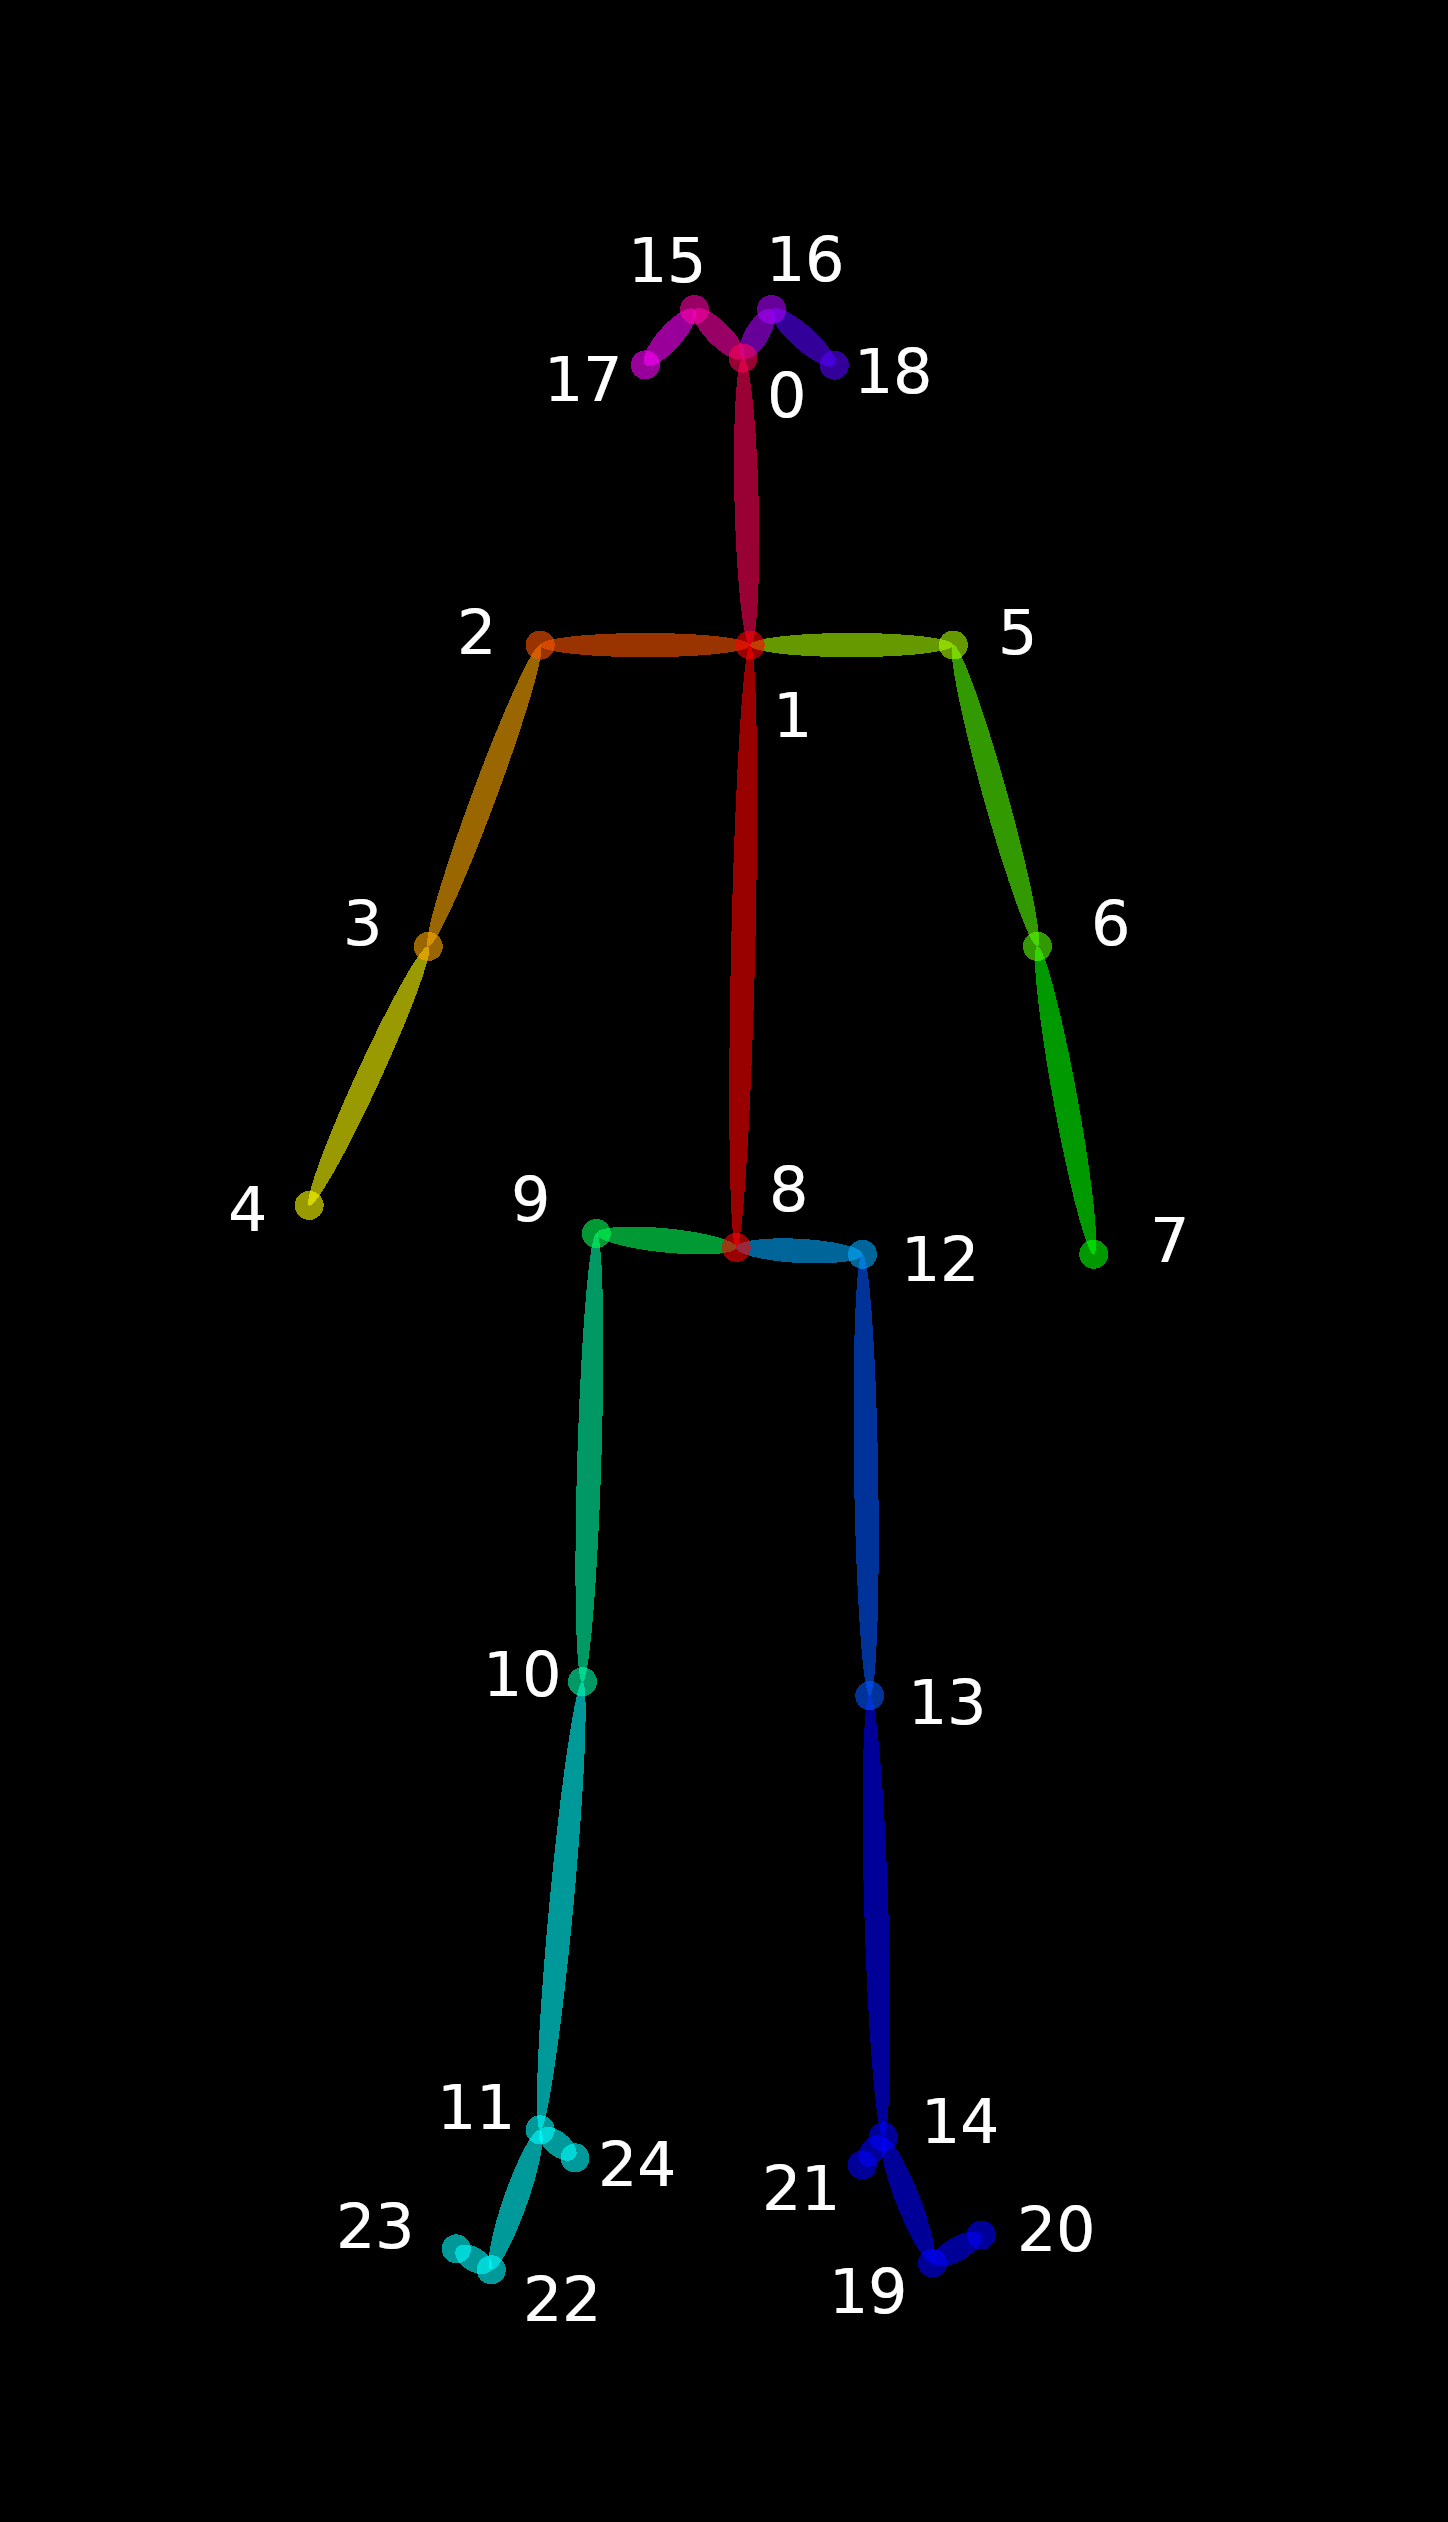

In [27]:
jj=0

face=np.array(data["people"][jj]["face_keypoints_2d"])# *70 points
pose=np.array(data["people"][jj]["pose_keypoints_2d"])# *25 points
hand_l=np.array(data["people"][jj]["hand_left_keypoints_2d"])# *25 points
hand_r=np.array(data["people"][jj]["hand_right_keypoints_2d"])
face[face>511]=511
pose[pose>511]=511
hand_l[hand_l>511]=511
hand_r[hand_r>511]=511


## Face & face points extraction

In [32]:
HEAD_SIZE=64
BODY_SIZE=512
head_mtx=np.zeros((21+1,HEAD_SIZE,HEAD_SIZE))
head_cent=(int(pose[0]),int(pose[1]))
if face is not None and sum(face):
    n_face=face.__len__()//3
    face=[ int(x) for x in face ]
    head_inside=head_cent[0]>0 and head_cent[0]<BODY_SIZE \
            and head_cent[1]>0 and head_cent[1]<BODY_SIZE
    for ii in range(0,n_face):
        if face[3*ii+1]-head_cent[1]+HEAD_SIZE//2>0 and face[3*ii]-head_cent[0]+HEAD_SIZE//2 >0 \
        and face[3*ii+1]-head_cent[1]+HEAD_SIZE//2<HEAD_SIZE and face[3*ii]-head_cent[0]+HEAD_SIZE//2 <HEAD_SIZE:
            head_mtx[ii%21,face[3*ii+1]-head_cent[1]+HEAD_SIZE//2,face[3*ii]-head_cent[0]+HEAD_SIZE//2]=1
head_mtx[21,...]=np.any(head_mtx[:21,...],0)
head_mtx[21,...]=1-head_mtx[21,...]
print("head center: ",head_cent[0],head_cent[1])
print("face x:min ",min(face[0::3]),"max ",max(face[0::3]))
print("face y:min ",min(face[1::3]),"max ",max(face[1::3]))
print("face new x_:min ",min(face[0::3])-head_cent[0],"max ",max(face[0::3])-head_cent[0])
print("face new y_:min ",min(face[1::3])-head_cent[1],"max ",max(face[1::3])-head_cent[1])

head center:  265 3
face x:min  243 max  276
face y:min  -9 max  18
face new x_:min  -22 max  11
face new y_:min  -12 max  15


In [31]:
face[3*ii]-head_cent[0]+HEAD_SIZE//2

10

In [5]:
img[:,head_cent[1]-32:head_cent[1]+32,head_cent[0]-32:head_cent[0]+32].shape

torch.Size([3, 64, 64])

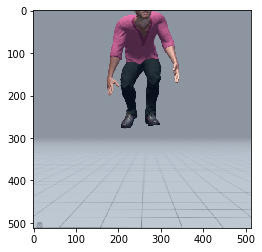

In [34]:
plt.imshow(img.transpose(2,0).transpose(1,0))

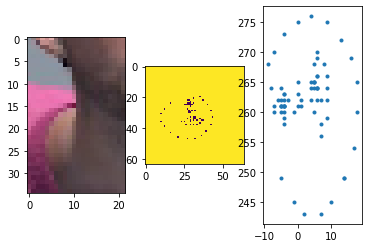

In [33]:
head_img=np.zeros((3,HEAD_SIZE,HEAD_SIZE))

import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.imshow(img[:,np.maximum(0,head_cent[1]-HEAD_SIZE//2):head_cent[1]+HEAD_SIZE//2,\
    np.maximum(0,head_cent[0]-HEAD_SIZE//2):np.minimum(256-1,head_cent[0]+HEAD_SIZE//2)].transpose(2,0).transpose(1,0))
plt.subplot(1,3,2)
plt.imshow(head_mtx[21,...])
plt.subplot(1,3,3)
plt.plot(face[1::3],face[0::3],".")

In [67]:
Mtx=np.zeros((24+5+5+1,512,512))
bodylink_list=[
    (0,1),(1,2),(2,3),(3,4),(1,5),(5,6),(6,7),
    (1,8),(8,9),(9,10),(10,11),(8,12),(12,13),(13,14),
    (0,15),(0,16),(15,17),(16,18),
    (14,19),(19,20),(14,21),
    (11,22),(22,23),(11,24)
]
handlink_list=[
    (0,1),(0,5),(0,9),(0,13),(0,17),
    (1,2),(5,6),(9,10),(13,14),(17,18),
    (2,3),(6,7),(10,11),(14,15),(18,19),
    (3,4),(7,8),(8,12),(15,16),(19,20)
    ]

if pose is not None:
    #n_pose=pose.__len__()//3
    pose=[ int(x) for x in pose ]
    ii=0
    for p1,p2 in bodylink_list:
        #dist=int(abs(complex(pose[3*p1+1]-pose[3*p2+1],pose[3*p1]-pose[3*p2])))+1
        dist=int(max(abs(pose[3*p1+1]-pose[3*p2+1]),abs(pose[3*p1]-pose[3*p2])))+1
        xline=np.linspace(pose[3*p1+1],pose[3*p2+1],dist).astype(int)
        yline=np.linspace(pose[3*p1],pose[3*p2],dist).astype(int)
        Mtx[ii,xline,yline]=1
        ii=ii+1
if hand_l is not None:
   
    hand_l=[ int(x) for x in hand_l ]
    ii=0
    for p1,p2 in handlink_list:
        dist=int(abs(complex(hand_l[3*p1+1]-hand_l[3*p2+1],hand_l[3*p1]-hand_l[3*p2])))+1
        #dist=int(max(abs(hand_l[3*p1+1]-hand_l[3*p2+1]),abs(hand_l[3*p1]-hand_l[3*p2])))+1
        xline=np.linspace(hand_l[3*p1+1],hand_l[3*p2+1],dist).astype(int)
        yline=np.linspace(hand_l[3*p1],hand_l[3*p2],dist).astype(int)
        Mtx[24+ii%5,xline,yline]=1
        ii+=1

if hand_r is not None:
    hand_r=[ int(x) for x in hand_r ]
    ii=0
    for p1,p2 in handlink_list:
        dist=int(abs(complex(hand_r[3*p1+1]-hand_r[3*p2+1],hand_r[3*p1]-hand_r[3*p2])))+1
        #dist=int(max(abs(hand_r[3*p1+1]-hand_r[3*p2+1]),abs(hand_r[3*p1]-hand_r[3*p2])))+1
        xline=np.linspace(hand_r[3*p1+1],hand_r[3*p2+1],dist).astype(int)
        yline=np.linspace(hand_r[3*p1],hand_r[3*p2],dist).astype(int)
        for kk,xx in enumerate(xline):
            Mtx[29+ii%5,xx,yline[kk]]=1
        ii+=1
for ii in range(24):
    Mtx[ii,...]=cv2.dilate(Mtx[ii,...],KERNEL)
for ii in range(24,34):
    Mtx[ii,...]=cv2.dilate(Mtx[ii,...],KERNEL_HAND)
Mtx[34,...]=np.any(Mtx[:34,...],0)
Mtx[34,...]=1-Mtx[34,...]

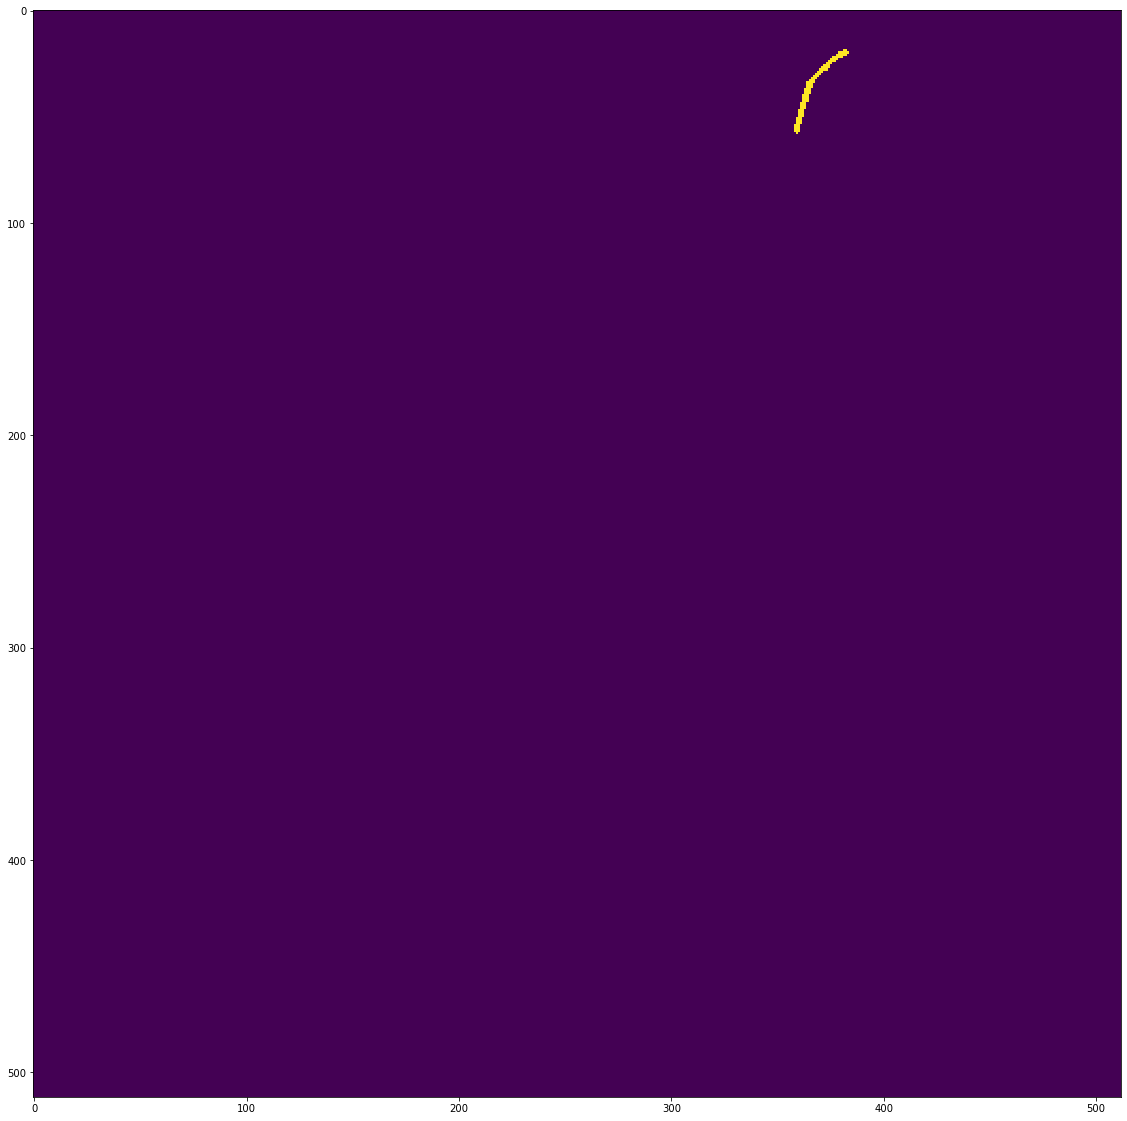

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(Mtx[25,...])

In [ ]:
for p1,p2 in bodylink_list:
    print(p1,p2)
    dist=int(abs(complex(pose[3*p1+1]-pose[3*p2+1],pose[3*p1]-pose[3*p2])))+1
    xline=np.linspace(pose[3*p1+1],pose[3*p2+1],dist).round()
    yline=np.linspace(pose[3*p1],pose[3*p2],dist).round()
    print(xline.shape,yline.shape)
    print(pose[3*p1+1],pose[3*p2+1],xline)
    print(pose[3*p1],pose[3*p2],yline)
    

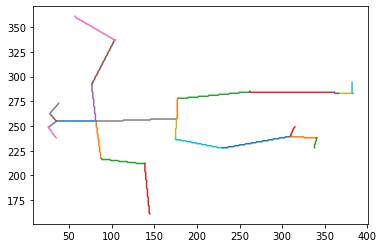

In [142]:
for p1,p2 in bodylink_list:
    #dist=int(abs(complex(pose[3*p1+1]-pose[3*p2+1],pose[3*p1]-pose[3*p2])))+1
    dist=int(max(abs(pose[3*p1+1]-pose[3*p2+1]),abs(pose[3*p1]-pose[3*p2])))+1
    xline=np.linspace(pose[3*p1+1],pose[3*p2+1],dist).astype(int)
    yline=np.linspace(pose[3*p1],pose[3*p2],dist).astype(int)
    plt.plot(xline,)

In [ ]:
from utils import loaders,model_fun
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np


NUM_GPU=torch.cuda.device_count()
EPOCHS=100
NITER=20
#-------------------------------------Loader Building---------------------------------

train_set=loaders.CostumImFolder(["./data/anime/train_img/"],
                                 ["./data/anime/train_label/"])

train_loader=DataLoader(train_set, batch_size=2, shuffle=True,num_workers = 4*NUM_GPU,pin_memory=True)

print(train_set.transform)
print(train_set.target_transform)


In [ ]:
pwd
